In [5]:
import pandas as pd

data = pd.read_csv('../Data/Processed/processed.csv')

### Agglomerative Clustering Hyper Parameter Tuning

In [45]:
from sklearn.cluster import AgglomerativeClustering

affinities = ["euclidean", "l1", "l2", "manhattan", "cosine"]
linkages = ["ward", "complete", "average", "single"]




In [46]:
combinations = []

for affinity in affinities:
    for linkage in linkages:
        # Ward can only be used with euclidean
        if linkage == "ward" and affinity== "euclidean" or linkage!="ward":
            combinations.append((affinity,linkage))

In [57]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for affinity, linkage in combinations:
    prediction = AgglomerativeClustering(affinity=affinity, linkage=linkage).fit_predict(X=data)
    sc = silhouette_score(data, prediction)
    silhouette_scores.append(sc)


In [48]:
silhouette_scores

[0.2881956100878649,
 0.47045655202262726,
 0.47045655202262726,
 0.47045655202262726,
 0.2535491433480789,
 0.47045655202262726,
 0.47045655202262726,
 0.47045655202262726,
 0.47045655202262726,
 0.47045655202262726,
 0.2535491433480789,
 0.47045655202262726,
 0.47045655202262726,
 0.27503076013279576,
 0.47045655202262726,
 0.21663822096620056]

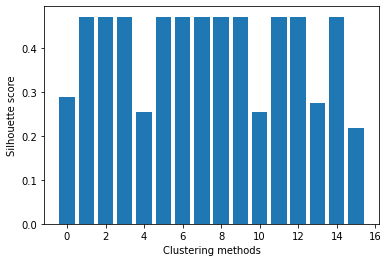

In [55]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(len(silhouette_scores))],silhouette_scores)
plt.xlabel("Clustering methods")
plt.ylabel("Silhouette score")
plt.show()